In [44]:
#(1) 데이터 가져오기
#터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
#여기에서 데이터를 상세히 확인할 수 있습니다.
import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [45]:
#(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
#to_datetime 활용 : 링크 참조
#pandas datetime extract year month day 키워드로 검색해 보기
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

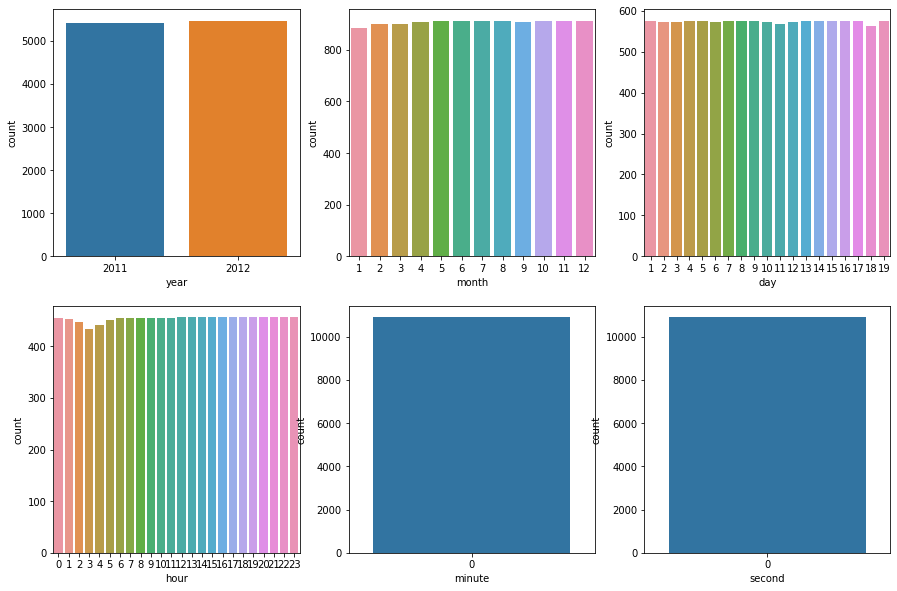

In [46]:
#(3) year, month, day, hour, minute, second 데이터 개수 시각화하기
#sns.countplot 활용해서 시각화하기
#subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(x='year', data=train, ax=axes[0, 0])
sns.countplot(x='month', data=train, ax=axes[0, 1])
sns.countplot(x='day', data=train, ax=axes[0, 2])
sns.countplot(x='hour', data=train, ax=axes[1, 0])
sns.countplot(x='minute', data=train, ax=axes[1, 1])
sns.countplot(x='second', data=train, ax=axes[1, 2])

plt.show()

In [47]:
#(4) X, y 컬럼 선택 및 train/test 데이터 분리
#X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

#count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기
from sklearn.model_selection import train_test_split
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual']#RMSE 150 이하를 위해 casual도 포함
y = train['count']

train_x, test_x, train_y, test_y = train_test_split(train[features], train['count'], test_size=0.2)

In [48]:
#(5) LinearRegression 모델 학습
#sklearn의 LinearRegression 모델 불러오기 및 학습하기
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#모델 학습하기
model.fit(train_x, train_y)

LinearRegression()

In [49]:
#(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
#학습된 모델에 X_test를 입력해서 예측값 출력하기
#모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
#mse 값과 함께 rmse 값도 계산하기
predictions = model.predict(test_x)

from sklearn.metrics import mean_squared_error

#mse 값
mse = mean_squared_error(predictions, test_y)

#mse 값과 함께 rmse 값도 계산하기
rmse = mse ** 0.5

print(mse)
print(rmse)

14724.326364381397
121.34383529615914


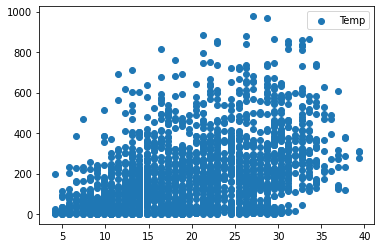

In [50]:
#(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
#x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
#x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기
import matplotlib.pyplot as plt

plt.scatter(test_x['temp'], test_y, label="Temp")
plt.legend()
plt.show()